In [15]:
import pandas as pd
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sp
from src import soporte_clustering as sc


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/raw/Global_Superstore.csv', encoding='ISO-8859-1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
sp.exploracion_datos(df)

El número de filas es 51290 y el número de columnas es 24

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Postal Code    80.51472
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category

None

In [16]:
df.head(2)

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,05-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [10]:
df.drop(columns=['Row ID','Postal Code','Customer ID','Customer Name','Ship Date','Order ID'],inplace=True)

In [11]:
df.columns

Index(['Order Date', 'Ship Mode', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
sp.exploracion_datos(df)

El número de filas es 51290 y el número de columnas es 18

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


Series([], dtype: float64)


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Order Date,51290,1430,18-06-2014,135
Ship Mode,51290,4,Standard Class,30775
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002
Region,51290,13,Central,11117
Product ID,51290,10292,OFF-AR-10003651,35
Category,51290,3,Office Supplies,31273



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Mode       51290 non-null  object 
 2   Segment         51290 non-null  object 
 3   City            51290 non-null  object 
 4   State           51290 non-null  object 
 5   Country         51290 non-null  object 
 6   Market          51290 non-null  object 
 7   Region          51290 non-null  object 
 8   Product ID      51290 non-null  object 
 9   Category        51290 non-null  object 
 10  Sub-Category    51290 non-null  object 
 11  Product Name    51290 non-null  object 
 12  Sales           51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Discount        51290 non-null  float64
 15  Profit          51290 non-null  float64
 16  Shipping Cos

None

In [13]:
GestorVisualizador = sp.Visualizador(df)

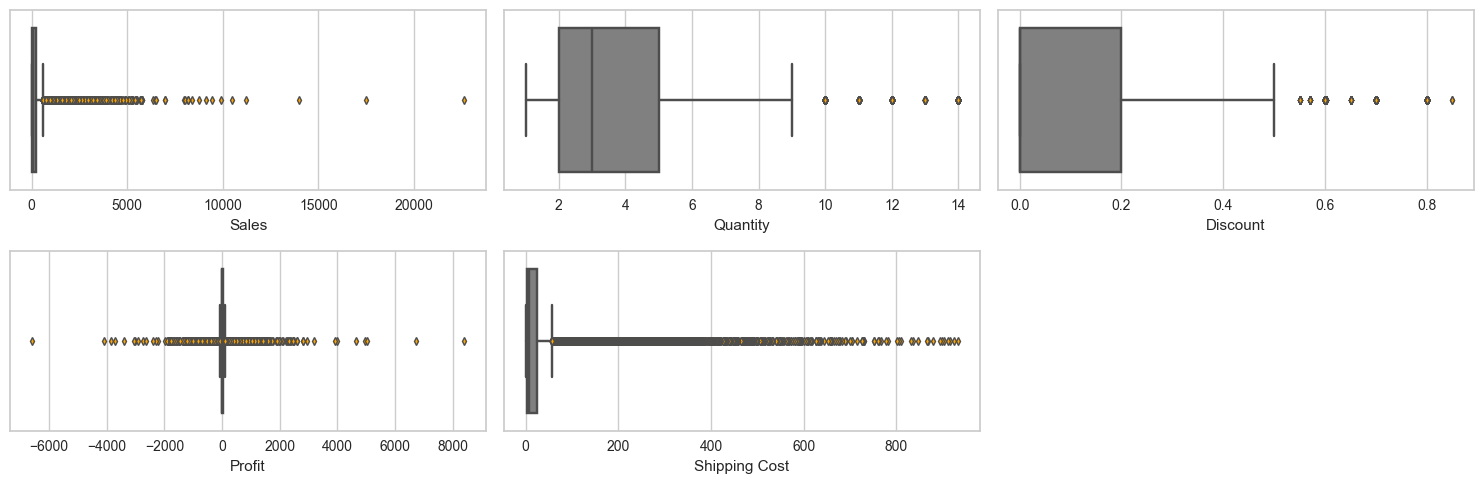

In [17]:
GestorVisualizador.deteccion_outliers()

In [19]:
df["Discount"].sort_values(ascending=False)

13251    0.85
5321     0.85
17118    0.80
47760    0.80
51064    0.80
         ... 
22280    0.00
22282    0.00
22283    0.00
22284    0.00
51289    0.00
Name: Discount, Length: 51290, dtype: float64

In [20]:
df["Discount"].value_counts()

Discount
0.000    29009
0.200     4998
0.100     4068
0.400     3177
0.600     2006
0.700     1786
0.500     1633
0.170      735
0.470      725
0.150      541
0.002      461
0.270      388
0.300      340
0.450      327
0.800      316
0.250      198
0.070      150
0.350      122
0.402      104
0.370       74
0.202       41
0.320       27
0.602       23
0.650       17
0.570       12
0.550       10
0.850        2
Name: count, dtype: int64

> Tras observar los Outliers, decido manetenerlos en una primera instancia ya que parecen ser valores reales, a pesar de que sean outliers